<h1 align="center"> 海洋数据分析 期中考总结 </h1>
<h2>目录<span class="tocSkip"></span></h2>

- ## [总体情况](#sec:overall)
- ## [考题简评](#sec:item)

---
---

## 🗂 <a id = "sec:overall"> 总体情况 </a>

---

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 分数
points = np.array([
    90, 90, 67, 96, 84, 93, 93, 62, 57, 92, 94, 83,
    89, 96, 86, 94, 93, 71, 92, 92, 82, 73, 98, 78,
    80, 92, 75, 98, 67, 92, 62, 92, 86, 96])

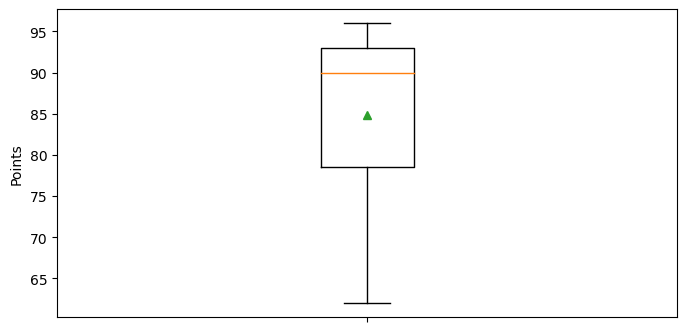

In [64]:
## 箱线图(boxplot)
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot(points, showmeans=True, whis=[5, 95], showfliers=False)

## 说明
ax.set_xticklabels([])
ax.set_ylabel("Points")

plt.show()

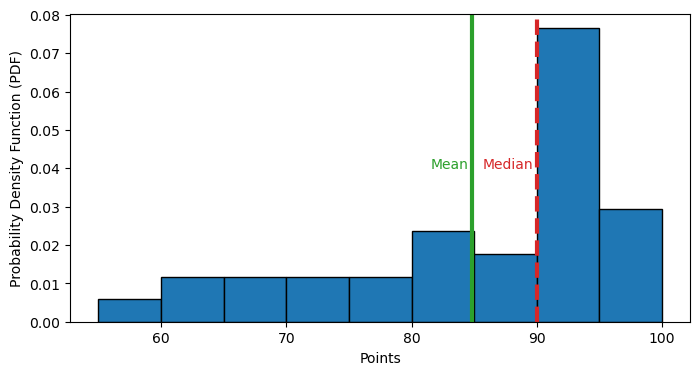

In [56]:
## 概率分布图(hist)
fig, ax = plt.subplots(figsize=(8, 4))

bins = np.arange(55, 100+1, 5)
ax.hist(points, bins=bins, density=True, ec="k")
ax.axvline(points.mean(), ls='-', lw=3, color='C2')
ax.axvline(np.median(points), ls='--', lw=3, color='C3')

## 说明
xdisp = -0.3
ydisp = 0.04
ax.text(points.mean()+xdisp, ydisp, "Mean", ha="right", c="C2")
ax.text(np.median(points)+xdisp, ydisp, "Median", ha="right", c="C3")
ax.set_xlabel("Points")
ax.set_ylabel("Probability Density Function (PDF)")

plt.show()

---
---

## 

---
---

## <a id = "sec:item"> 考题简评 </a>

---

#### 填空题: 完善函数`find_withinSigma()`，使代码能找出列表中所有在均值上下一个标准差范围内的元素。

In [59]:
# 载入相应模块
import numpy as np

# 定义find_withinSigma()函数
def find_withinSigma(data):
    avg = np.mean(data)
    std = np.std(data)
    
    ### 请在此完善find_withinSigma代码 ###
    ind = np.logical_and(data>=avg-std, data<=avg+std)
    return np.array(data)[ind]
    ### 请在此完善find_withinSigma代码 ###

# 原始数据
data = [
    3.383, 3.569, 4.191, 3.798, 2.321,
    2.758, 3.605, 4.264, 4.424, 2.681,
    1.594, 1.032, 2.409, 3.588, 3.721,
    3.514, 2.984, 1.158, 2.888, 2.157]

# 寻找平均值上下一个标准差内的元素值。
subdata = find_withinSigma(data)

print("All data points within one standard deviation from mean the value:\n",
    subdata)

All data points within one standard deviation from mean the value:
 [3.383 3.569 3.798 2.321 2.758 3.605 2.681 2.409 3.588 3.721 3.514 2.984
 2.888 2.157]


#### 常见错误:
#### `avg-std <= data <= avg+std`
#### 等效于`(avg-std <= data) <= avg+std` &rarr; `(True or False) <= avg+std`

---

#### 改错题: 这是一个利用函数实现从3维数据计算平面平均量垂直廓线的程序

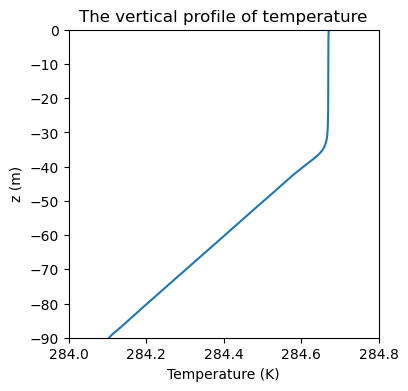

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
### 错误1: 没有载入numpy模块
import numpy

# 定义平均量垂直廓线计算函数
def get_vprof(arr_3d, axis_order = ['z', 'y', 'x']):
    
    # 检测输入数组是否为3维
    if len(arr_3d.shape) != 3:
        print("The input array is not 3D. STOP!!!")
        return -9999
    
    # 从需要平均的维度中去除z所在的维度
    axis_avg = [0, 1, 2]
    for ind in range(3):
        if axis_order[ind] == 'z':
            ### 错误2: 以下两行代码缩进错误，导致块体识别错误
            axis_avg.remove(ind)
            axis_avg = tuple(axis_avg)
    
    # 计算垂直廓线
    prof = numpy.mean(arr_3d, axis=axis_avg)
    return prof

# 读取海洋三维盐度数据
### 错误3: 错误文件名ocean_waveWind.npz, 应改为ocean_windWave.npz
data = numpy.load("./attachment/midTerm/ocean_windWave.npz")
z3d = data['z']
T3d = data['temperature']

# 计算温度的垂直廓线
z_prof = get_vprof(z3d)
T_prof = get_vprof(T3d)

# 结果展示
### 错误4: 错误子图坐标名axes，应改为ax
fig, ax = plt.subplots(figsize=(4, 4), nrows=1, ncols=1)
ax.plot(T_prof, z_prof)

ax.set_xlim([284, 284.8])
### 错误5: 纵坐标颠倒
ax.set_ylim([-90, 0])

ax.set_xlabel("Temperature (K)")
ax.set_ylabel("z (m)")
ax.set_title("The vertical profile of temperature")

plt.show()

---

#### 数据分析题：分析上层海洋温度模拟数据，并做相应成果展示，要求：
#### a. 海温数据存于`~/exam/data_midTerm/OML_temperature.npz`，包含相应的三维坐标与温度数据，区域大小为$L_x\times L_y\times L_z = 150m\times 150m \times 90m$，区域格点数为$n_x\times n_y\times n_z = 50\times 50\times 150$，其文件数组包含`x, y, z, T, nx, ny, nz`七个变量。利用NumPy模块读取文件中的数据，该过程极大简化了文件读取流程，数据读取后内含的变量可像字典一样取用；
#### b. 数据处理是提取原始数据关键信息的主要过程。现在将通过温度场数据处理获得海洋不同层结的混合特征。我们首先计算海洋三维温度场水平平均与标准差的垂直廓线，其中平均温度廓线代表海洋的平均分层状况，而标准差廓线代表海洋温度偏离平衡位置的振幅；
#### c. 现在进入数据展示与分析环节，重点从温度场展示海洋内波发生的区域。我们先建立一个具有3列子图的画布，子图横向比例根据自己的需求进行调节。
#### d. 在第一个子图上画`y=75m`的温度垂直剖面图，在第二子图上画温度平均值的垂直廓线图，在第三子图上画温度标准差的垂直廓线图，三图可进行数据的交叉对比，获得关键结论。
#### e. 在图上加上充分的说明，至少包含子图标题、坐标轴说明与色阶图，并保存图片。
#### 在最终结果中，应可以从所画图片中看到(i)在平均温度变化不大的深度，温度脉动变化不明显，对应温度标准差较小；(ii)在平均温度随深度减小的逆温层，由于密度随温度下降而上升，水体处于上轻下重的稳定状态，内波得以生成，温度脉动大，对应温度标准差较大，从垂直剖面图中亦可以看到对应的等温面波动特征。

## 如果看懂改错题第二题，那这题几乎是送分题。。。
## 唯一的问题只在于如何取`y=75m`的平面，这个平面位于`iy=25`的指数上。

In [ ]:
iy = 25
ax.contourf(x3d[:, iy, :], z3d[:, iy, :], temperature[:, iy, :])

---
---